In [91]:
import numpy as np 
import pandas as pd
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [92]:
train = pd.read_csv('amazon_train.csv')
test= pd.read_csv('amazon_test.csv')

In [93]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [95]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                58921 non-null  int64
 1   RESOURCE          58921 non-null  int64
 2   MGR_ID            58921 non-null  int64
 3   ROLE_ROLLUP_1     58921 non-null  int64
 4   ROLE_ROLLUP_2     58921 non-null  int64
 5   ROLE_DEPTNAME     58921 non-null  int64
 6   ROLE_TITLE        58921 non-null  int64
 7   ROLE_FAMILY_DESC  58921 non-null  int64
 8   ROLE_FAMILY       58921 non-null  int64
 9   ROLE_CODE         58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [97]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [98]:
test.isnull().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

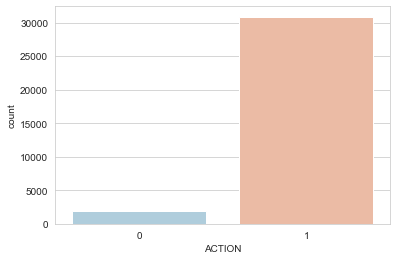

94.21 % of train_data can be accessed
5.79 % of test_data tested cannot be accessed


In [99]:
# visualize the number of people who were granted access 
sns.set_style('whitegrid')
sns.countplot(x='ACTION',data=train,palette='RdBu_r')
plt.show()

print(np.round(train[train['ACTION']==1].shape[0]/train.shape[0]*100,2),'% of train_data can be accessed')
print(np.round(train[train['ACTION']==0].shape[0]/train.shape[0]*100,2),'% of test_data tested cannot be accessed')

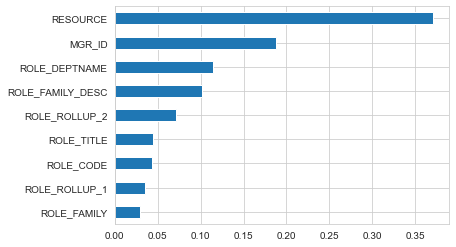

In [100]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('ACTION', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [101]:
y=train['ACTION']
x=train.drop('ACTION',axis=1)

In [102]:
#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=0)

In [103]:
#Logistic Regression
LogisticRegressor = LogisticRegression(max_iter=10000)
LogisticRegressor.fit(x_train, y_train)
y_predicted = LogisticRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted))

Mean Squared Error: 0.05675923100396704
R score: -0.06017470074409559
Mean Absolute Error: 0.05675923100396704
f1 score:
0.9707914572864321
accuracy score:
0.9432407689960329


In [104]:
# Decision Tree - CART
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
y_predicted_d = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_d)
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted_d))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted_d))

Mean Squared Error: 0.0729325602685383
R score: -0.362267491816338
Mean Absolute Error: 0.0729325602685383
f1 score:
0.9612117933459561
accuracy score:
0.9270674397314617


In [105]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted_r))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted_r))

Mean Squared Error: 0.051876716509002135
R score: 0.031023122975826545
Mean Absolute Error: 0.051876716509002135
f1 score:
0.9728029010238908
accuracy score:
0.9481232834909978


In [106]:
# copy the test data
testdata = test

In [107]:
test=test.drop('id',axis=1)

In [108]:
# Random Forest as the final model
rf = RandomForestClassifier()
rf.fit(x,y)
Prediction = rf.predict(test)
Prediction

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
result = pd.DataFrame({'ID':testdata['id'], 'ACTION':Prediction})
result.head()

,ID,ACTION
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
